This descriptive analysis provides a foundation for HR to understand the key characteristics and factors influencing absenteeism within the workforce. It can guide HR in developing targeted strategies to address specific challenges and create a healthier work environment.


We were able to caaried out Absenteeism Analysis on the following:

Absenteeism Distribution:
Explore the distribution of the target variable 'Absenteeism_time_in_hours' using a histogram or kernel density plot.
Identify any skewness or outliers in the distribution.


Reasons for Absence:
Investigate the distribution of reasons for absence ('reason') to identify common reasons.
Consider creating a bar chart to visualize the frequency of each reason.


Seasonal Patterns:
Analyze the distribution of absenteeism across different seasons ('season_names').
Create a bar chart or line plot to visualize how absenteeism varies throughout the year.



We are able to visualize Employee Characteristics base on the following:


Age Distribution:
Visualize the distribution of employee ages using a histogram or kernel density plot.
Identify the age demographics of the workforce.


BMI Distribution:
Explore the distribution of Body Mass Index ('Body_mass_index').
Consider a histogram or box plot to understand the BMI distribution.


Social Habits Impact:
Utilize count plots to visualize the impact of social habits ('Social_smoker', 'Social_drinker') on absenteeism.
Compare the counts of employees with and without these habits.


Education Level:
Examine the distribution of education levels ('Education').
Consider a bar chart to visualize the educational background of employees.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##importing the dataset from local directory

abs = pd.read_csv(r"C:\Users\HP\Desktop\data\Absenteeism_at_work.csv")
com = pd.read_csv(r"C:\Users\HP\Desktop\data\compensation.csv")
rea = pd.read_csv(r"C:\Users\HP\Desktop\data\Reasons.csv")

In [3]:
rea.head(3)

,Number,Reason
0,0,Unkown
1,1,Certain infectious and parasitic diseases
2,2,Neoplasms


In [4]:
com.head(3)

,ID,comp/hr
0,1,35
1,2,49
2,3,47


In [5]:
abs.head(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2


CLEANING, MERGING, SORTING OF THE DATASET

In [8]:
# Left join Absenteeism_at_work with compensation on ID

merged_data = pd.merge(abs, com, on='ID', how='left')

In [10]:
merged_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,comp/hr
0,1,26,7,3,1,289,36,13,33,"239,554",...,1,2,1,0,1,90,172,30,4,35
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,0,0,98,178,31,0,49
2,3,23,7,4,1,179,51,18,38,"239,554",...,1,0,1,0,0,89,170,31,2,47
3,4,7,7,5,1,279,5,14,39,"239,554",...,1,2,1,1,0,68,168,24,4,51
4,5,23,7,5,1,289,36,13,33,"239,554",...,1,2,1,0,1,90,172,30,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,736,14,7,3,1,289,36,13,33,"264,604",...,1,2,1,0,1,90,172,30,8,55
736,737,11,7,3,1,235,11,14,37,"264,604",...,3,1,0,0,1,88,172,29,4,26
737,738,0,0,3,1,118,14,13,40,"271,219",...,1,1,1,0,8,98,170,34,0,48
738,739,0,0,4,2,231,35,14,39,"271,219",...,1,2,1,0,2,100,170,35,0,42


In [12]:
# Left join with Reasons on Reason_for_absence


merged_data = pd.merge(merged_data, rea, left_on='Reason for absence', right_on='Number', how='left')

In [14]:
merged_data.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,comp/hr,Number,Reason
0,1,26,7,3,1,289,36,13,33,"239,554",...,1,0,1,90,172,30,4,35,26,unjustified absence
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,0,0,98,178,31,0,49,0,Unkown
2,3,23,7,4,1,179,51,18,38,"239,554",...,1,0,0,89,170,31,2,47,23,medical consultation
3,4,7,7,5,1,279,5,14,39,"239,554",...,1,1,0,68,168,24,4,51,7,Diseases of the eye and adnexa
4,5,23,7,5,1,289,36,13,33,"239,554",...,1,0,1,90,172,30,2,25,23,medical consultation


In [15]:
# Define a function for BMI category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'healthy weight'
    elif 25 <= bmi < 30:
        return 'overweight'
    elif bmi >= 30:
        return 'obese'
    else:
        return 'unknown'

In [17]:
# Apply BMI category function to create a new column
merged_data['BMI_category'] = merged_data['Body mass index'].apply(bmi_category)

In [18]:
# Define a function for season names
def season_names(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'unknown'

In [21]:
# Apply season names function to create a new column
merged_data['season_names'] = merged_data['Month of absence'].apply(season_names)


In [22]:
merged_data.head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Pet,Weight,Height,Body mass index,Absenteeism time in hours,comp/hr,Number,Reason,BMI_category,season_names
0,1,26,7,3,1,289,36,13,33,"239,554",...,1,90,172,30,4,35,26,unjustified absence,obese,Summer
1,2,0,7,3,1,118,13,18,50,"239,554",...,0,98,178,31,0,49,0,Unkown,obese,Summer


In [52]:
# Select the desired columns
data_ = merged_data[['ID', 'Reason', 'Month of absence', 'Body mass index', 'BMI_category', 'season_names',
                        'Month of absence', 'Day of the week', 'Transportation expense', 'Education', 'Son',
                        'Social smoker', 'Social drinker', 'Pet', 'Age', 'Disciplinary failure',
                         'Absenteeism time in hours']]

In [53]:
data_.head(5)

,ID,Reason,Month of absence,Body mass index,BMI_category,season_names,Month of absence,Day of the week,Transportation expense,Education,Son,Social smoker,Social drinker,Pet,Age,Disciplinary failure,Absenteeism time in hours
0,1,unjustified absence,7,30,obese,Summer,7,3,289,1,2,0,1,1,33,0,4
1,2,Unkown,7,31,obese,Summer,7,3,118,1,1,0,1,0,50,1,0
2,3,medical consultation,7,31,obese,Summer,7,4,179,1,0,0,1,0,38,0,2
3,4,Diseases of the eye and adnexa,7,24,healthy weight,Summer,7,5,279,1,2,1,1,0,39,0,4
4,5,medical consultation,7,30,obese,Summer,7,5,289,1,2,0,1,1,33,0,2


In [54]:
##to show the number of row and column in a dataset 
data_.shape

(740, 17)

In [55]:
###to show the datatypes of each columns
data_.dtypes

ID                            int64
Reason                       object
Month of absence              int64
Body mass index               int64
BMI_category                 object
season_names                 object
Month of absence              int64
Day of the week               int64
Transportation expense        int64
Education                     int64
Son                           int64
Social smoker                 int64
Social drinker                int64
Pet                           int64
Age                           int64
Disciplinary failure          int64
Absenteeism time in hours     int64
dtype: object

In [56]:
##check the null-values
data_.isnull()

,ID,Reason,Month of absence,Body mass index,BMI_category,season_names,Month of absence,Day of the week,Transportation expense,Education,Son,Social smoker,Social drinker,Pet,Age,Disciplinary failure,Absenteeism time in hours
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
##to show the total number of null values in each columns
data_.isnull().sum()

ID                           0
Reason                       0
Month of absence             0
Body mass index              0
BMI_category                 0
season_names                 0
Month of absence             0
Day of the week              0
Transportation expense       0
Education                    0
Son                          0
Social smoker                0
Social drinker               0
Pet                          0
Age                          0
Disciplinary failure         0
Absenteeism time in hours    0
dtype: int64

#                               Exploratory Data Analysis and Visualization 

In [58]:
##Count the number of unique values in categorical columns

data_.describe()

,ID,Month of absence,Body mass index,Month of absence,Day of the week,Transportation expense,Education,Son,Social smoker,Social drinker,Pet,Age,Disciplinary failure,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,370.500000,6.324324,26.677027,6.324324,3.914865,221.329730,1.291892,1.018919,0.072973,0.567568,0.745946,36.450000,0.054054,6.924324
std,213.763888,3.436287,4.285452,3.436287,1.421675,66.952223,0.673238,1.098489,0.260268,0.495749,1.318258,6.478772,0.226277,13.330998
min,1.000000,0.000000,19.000000,0.000000,2.000000,118.000000,1.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000
25%,185.750000,3.000000,24.000000,3.000000,3.000000,179.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,2.000000
50%,370.500000,6.000000,25.000000,6.000000,4.000000,225.000000,1.000000,1.000000,0.000000,1.000000,0.000000,37.000000,0.000000,3.000000
75%,555.250000,9.000000,31.000000,9.000000,5.000000,260.000000,1.000000,2.000000,0.000000,1.000000,1.000000,40.000000,0.000000,8.000000
max,740.000000,12.000000,38.000000,12.000000,6.000000,388.000000,4.000000,4.000000,1.000000,1.000000,8.000000,58.000000,1.000000,120.000000


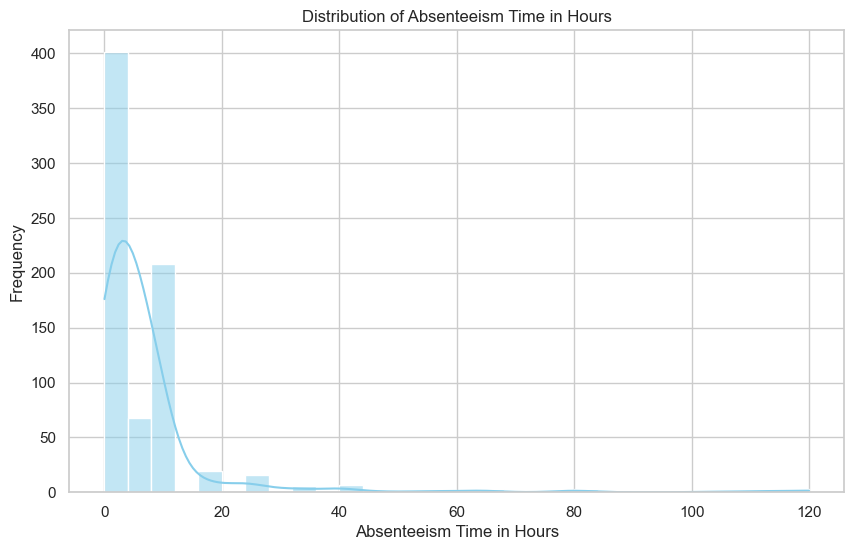

In [59]:
##To check the distribution of the target variable ('Absenteeism_time_in_hours'), you can use a histogram or a kernel density estimate plot.


# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plot a histogram for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data_['Absenteeism time in hours'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Absenteeism Time in Hours')
plt.ylabel('Frequency')
plt.show()


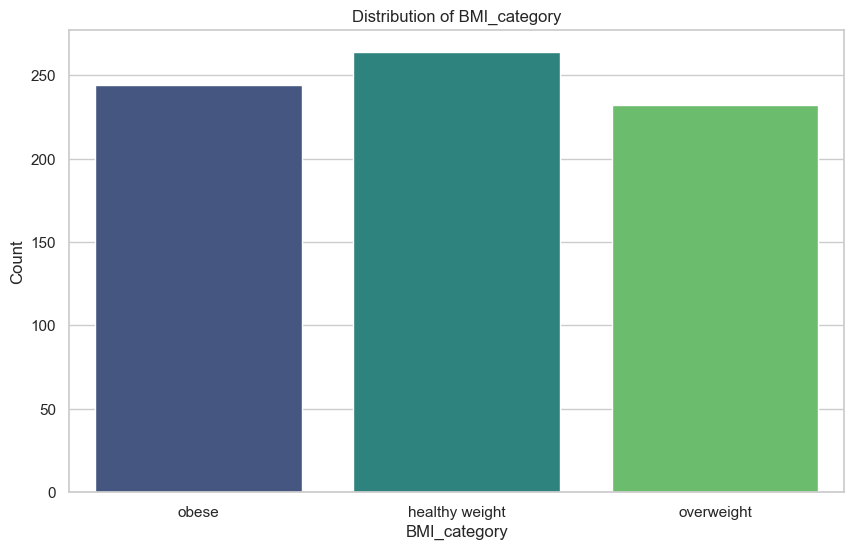

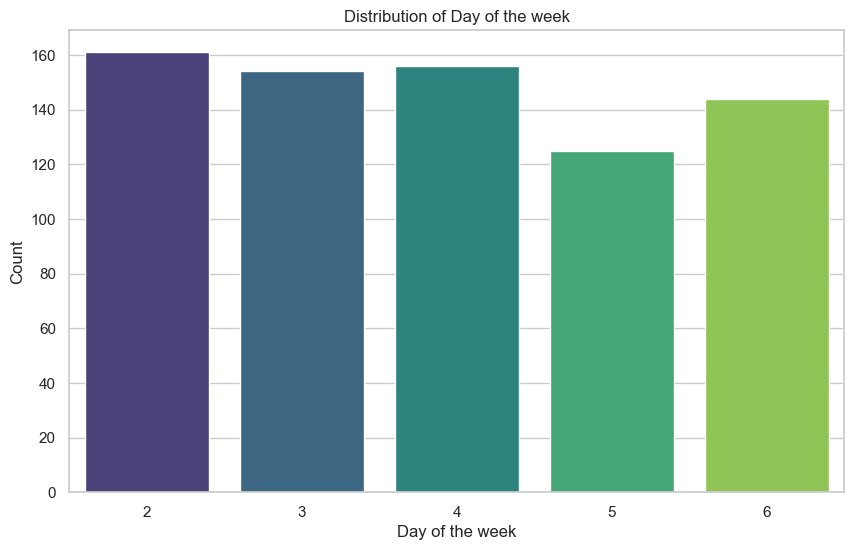

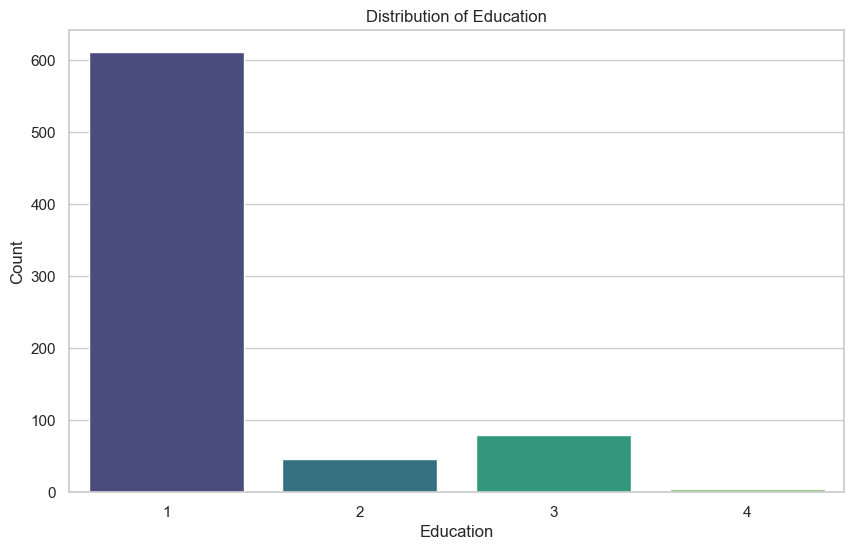

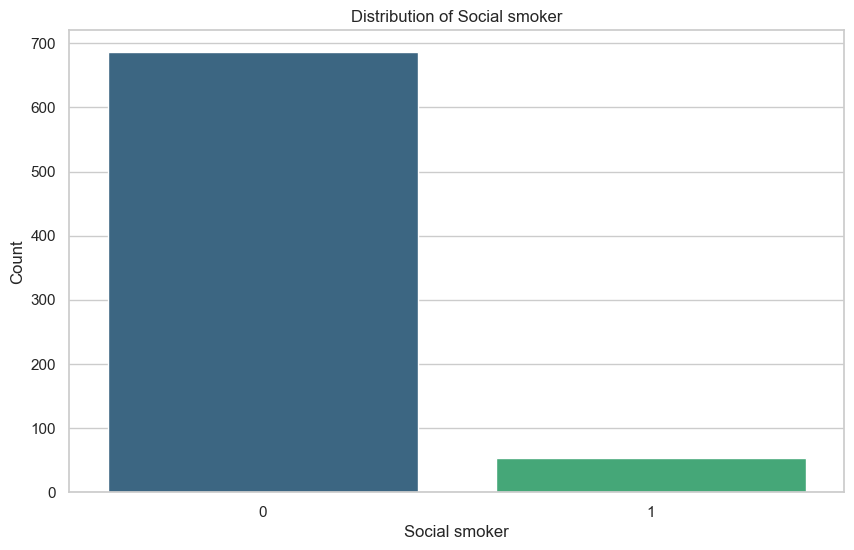

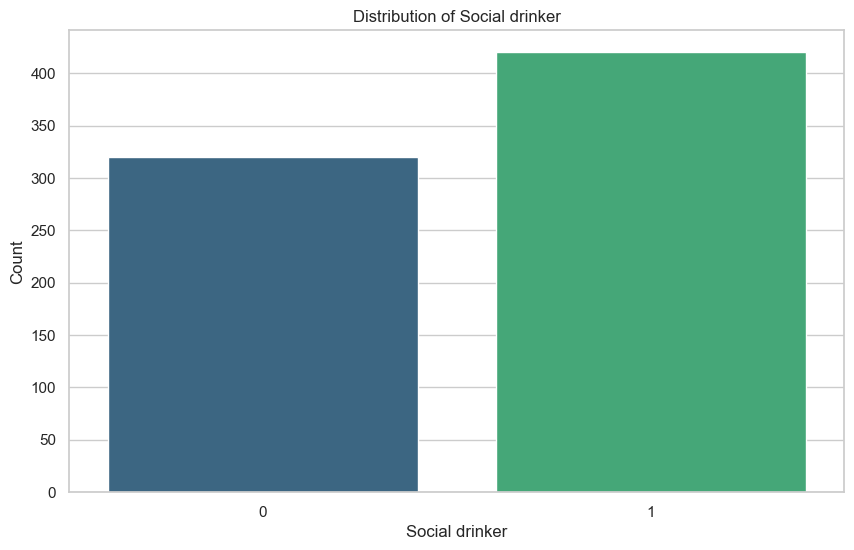

In [63]:
### we count plots to check the distribution of categorical variables


# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# List of categorical variables to visualize
categorical_vars = ['BMI_category', 'Day of the week', 'Education', 'Social smoker', 'Social drinker']

# Plot count plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=data_, palette="viridis")
    
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_10184\1264689800.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_.corr()


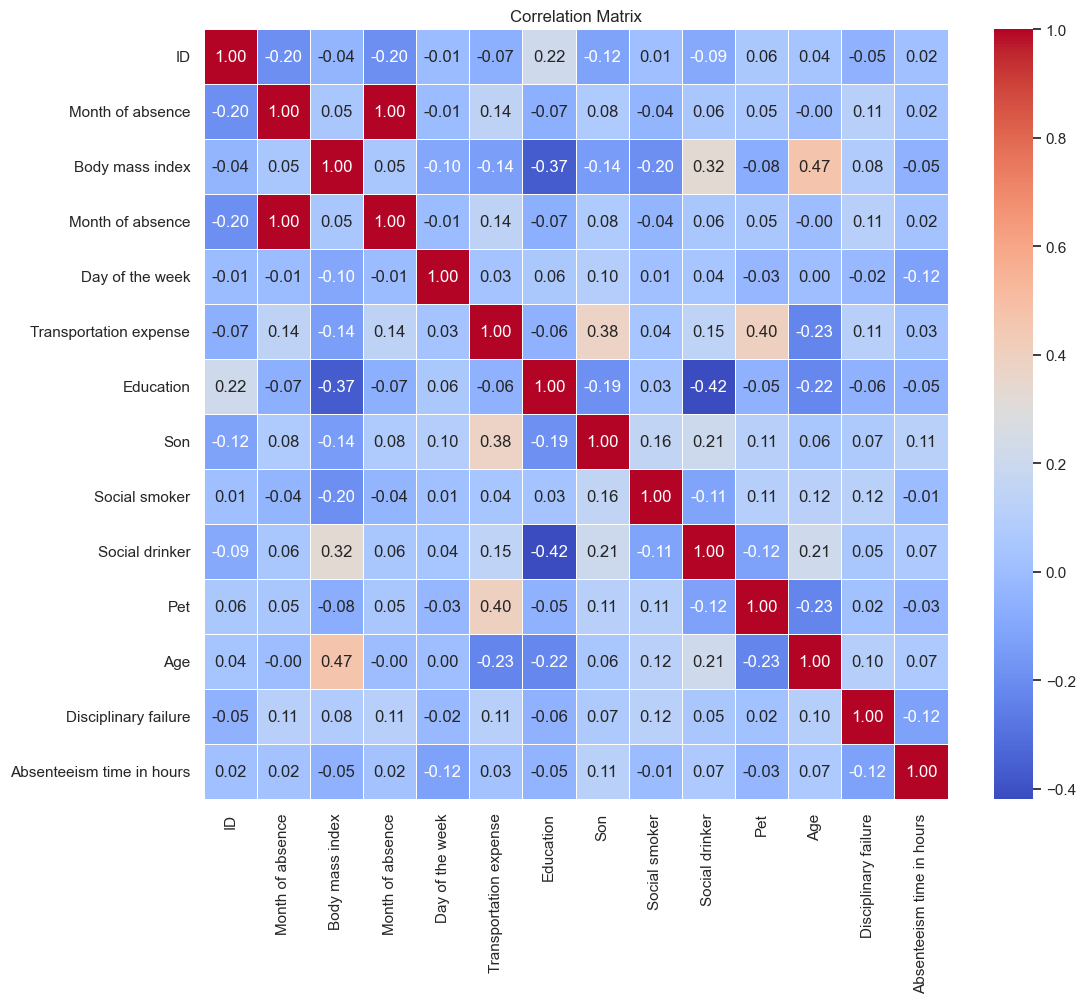

In [64]:
###to check correlation matrix to understand relationships between numerical variables

# Calculate the correlation matrix
correlation_matrix = data_.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Correlation Matrix')
plt.show()


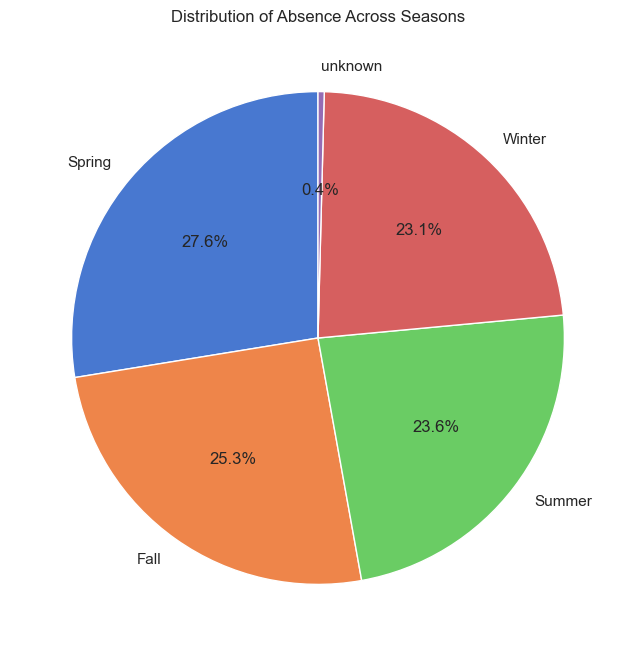

In [78]:
# Univariate Analysis and Visualization for 'season_names'

# Pie chart for Distribution of Absence Across Seasons
plt.figure(figsize=(8, 8))
season_counts = data_['season_names'].value_counts()
labels = season_counts.index
plt.pie(season_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Distribution of Absence Across Seasons')
plt.show()


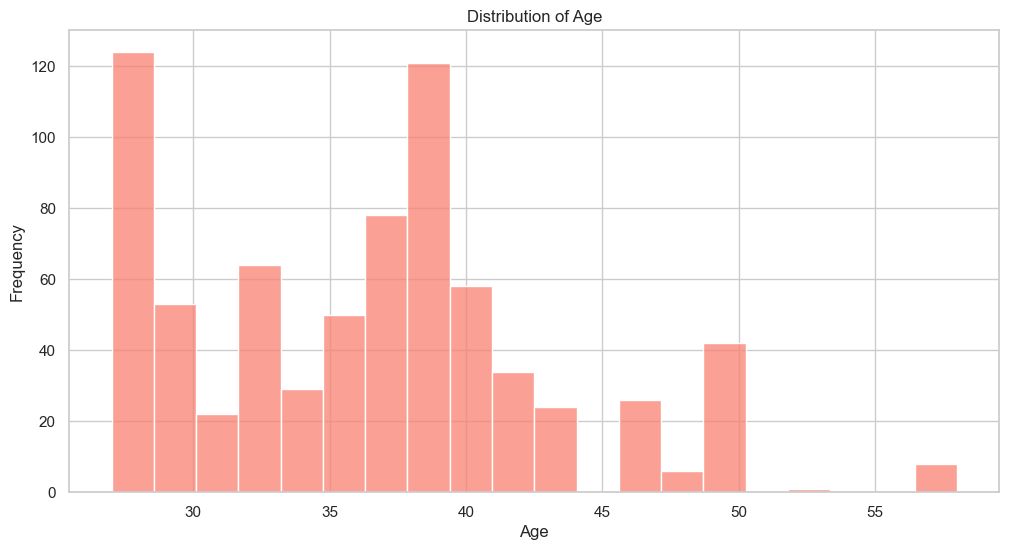

In [65]:
# Univariate Analysis and Visualization for 'Age'
plt.figure(figsize=(12, 6))
sns.histplot(data_['Age'], bins=20, color='salmon')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

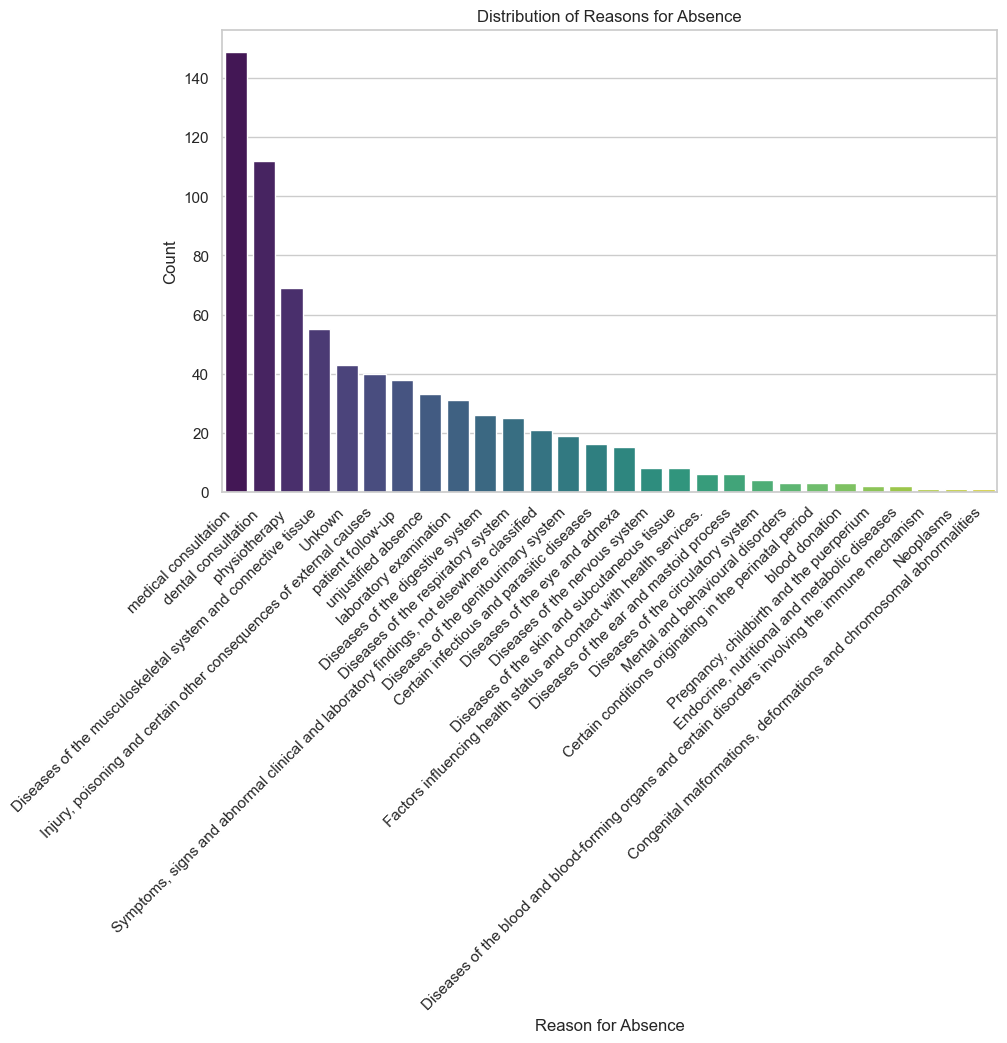

In [74]:
#### To identify common reasons for absenteeism.
# Assuming 'data_' is your merged DataFrame

# Count the occurrences of each reason for absence
reason_counts = data_['Reason'].value_counts()

# Create a bar plot for the distribution of reasons for absence
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='viridis')
plt.title('Distribution of Reasons for Absence')
plt.xlabel('Reason for Absence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10184\3182798315.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Disciplinary failure', y='Absenteeism time in hours', data=data_, ci=None)


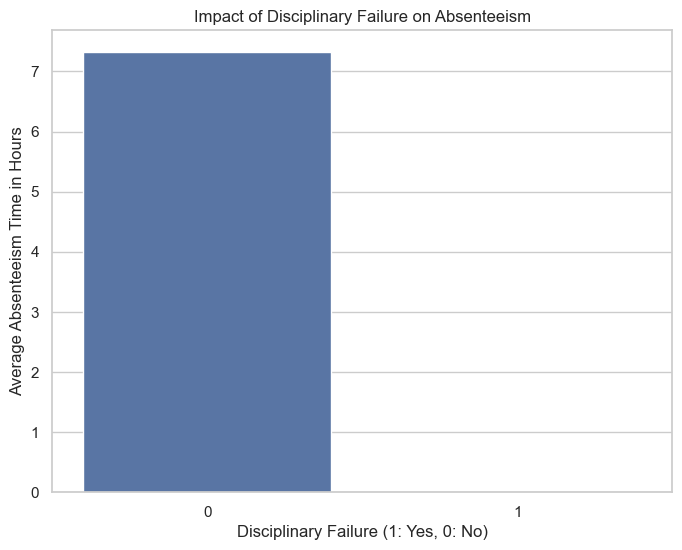

In [77]:
#### To create a bar plot to visualize the impact of disciplinary failure on absenteeism


# Bar plot for Disciplinary Failure Impact on Absenteeism
plt.figure(figsize=(8, 6))
sns.barplot(x='Disciplinary failure', y='Absenteeism time in hours', data=data_, ci=None)
plt.title('Impact of Disciplinary Failure on Absenteeism')
plt.xlabel('Disciplinary Failure (1: Yes, 0: No)')
plt.ylabel('Average Absenteeism Time in Hours')
plt.show()


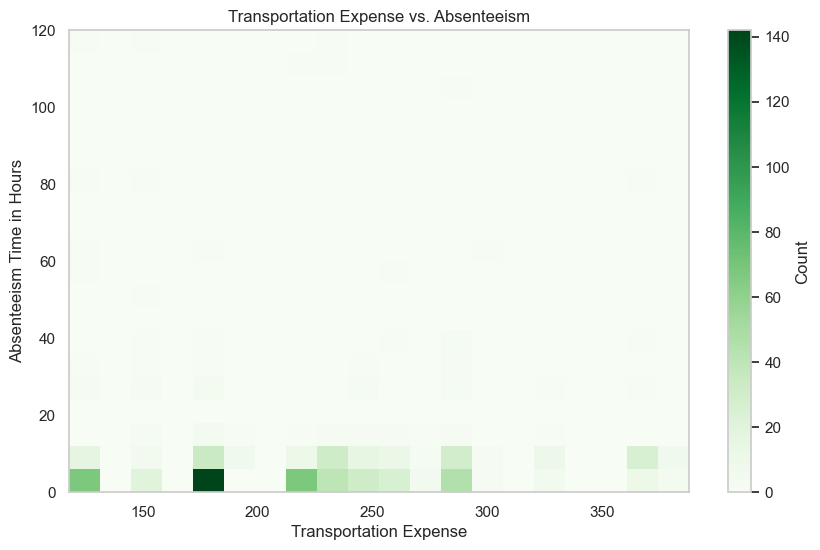

In [92]:
###Analyze the relationship between 'Transportation_expense' and 'Absenteeism_time_in_hours'.



# Filter out rows with missing values in 'Transportation_expense' and 'Absenteeism_time_in_hours'
filtered_df = data_[['Transportation expense', 'Absenteeism time in hours']].dropna()

# Plot a histogram for 'Transportation_expense' vs. 'Absenteeism_time_in_hours'
plt.figure(figsize=(10, 6))
plt.hist2d(filtered_df['Transportation expense'], filtered_df['Absenteeism time in hours'], bins=(20, 20), cmap='Greens')
plt.colorbar(label='Count')
plt.title('Transportation Expense vs. Absenteeism')
plt.xlabel('Transportation Expense')
plt.ylabel('Absenteeism Time in Hours')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10184\544818570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['Education'] = pd.Categorical(data_['Education'])


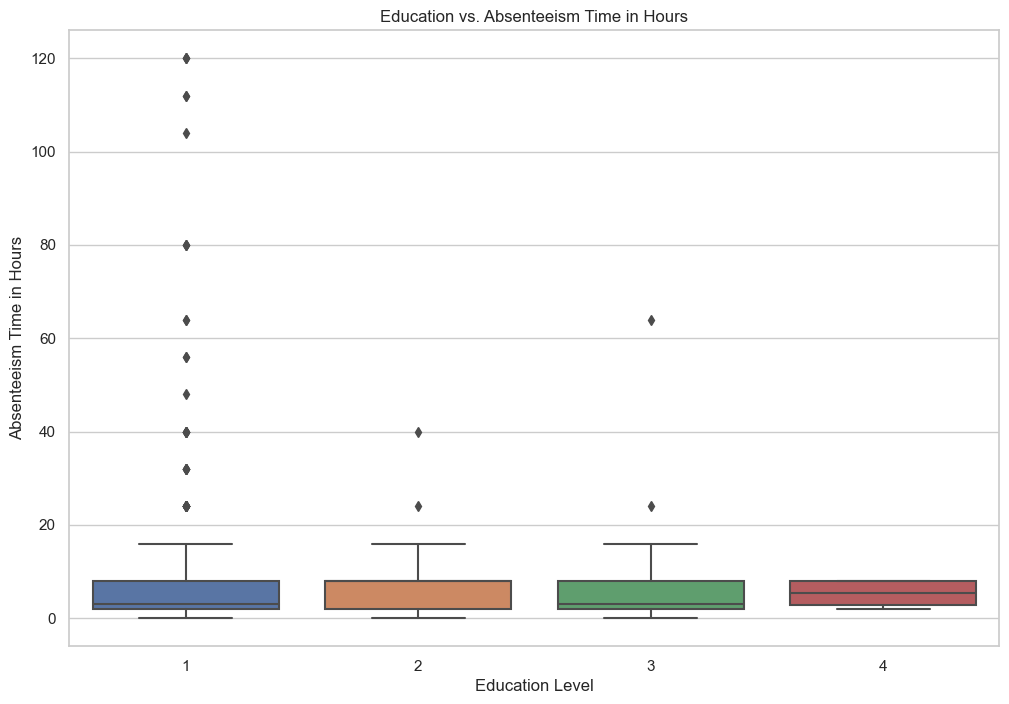

In [93]:
### Investigate how 'Education' level relates to absenteeism.



# Example code to convert 'Education' to a categorical variable
data_['Education'] = pd.Categorical(data_['Education'])

# Create a box plot to visualize the relationship between 'Education' and 'Absenteeism_time_in_hours'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='Absenteeism time in hours', data=data_)
plt.title('Education vs. Absenteeism Time in Hours')
plt.xlabel('Education Level')
plt.ylabel('Absenteeism Time in Hours')
plt.show()

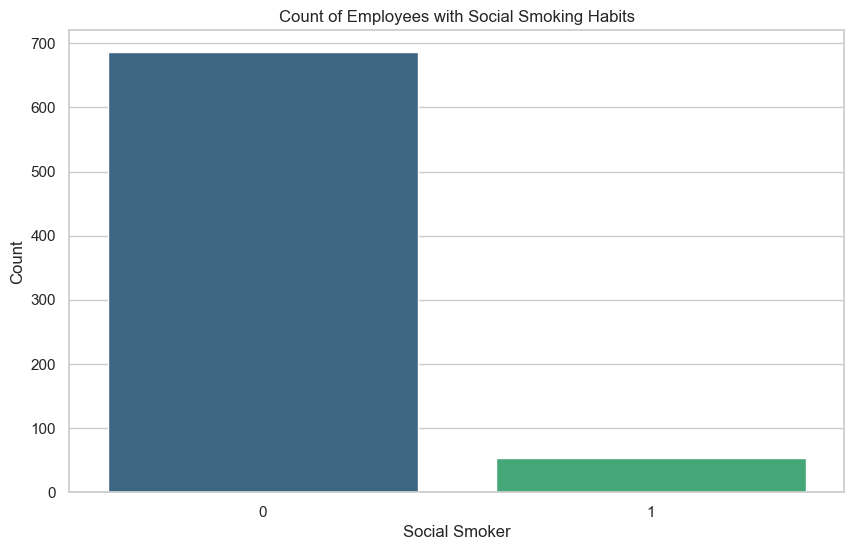

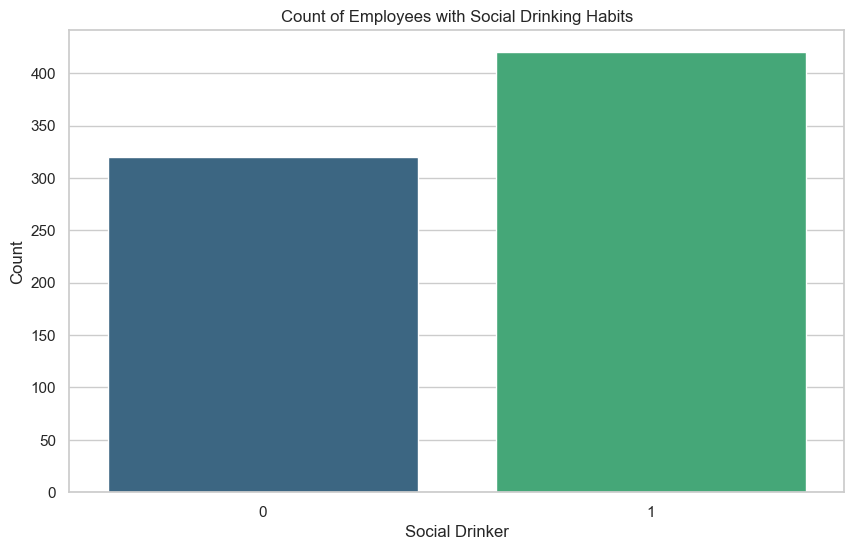

In [94]:
##### let Explore how being a 'Social_smoker' or 'Social_drinker' may impact absenteeism.


# Count plot for Social Smokers
plt.figure(figsize=(10, 6))
sns.countplot(x='Social smoker', data=data_, palette='viridis')
plt.title('Count of Employees with Social Smoking Habits')
plt.xlabel('Social Smoker')
plt.ylabel('Count')
plt.show()

# Count plot for Social Drinkers
plt.figure(figsize=(10, 6))
sns.countplot(x='Social drinker', data=data_, palette='viridis')
plt.title('Count of Employees with Social Drinking Habits')
plt.xlabel('Social Drinker')
plt.ylabel('Count')
plt.show()
